In [11]:
import pandas as pd

df=pd.read_csv('fct_invoice.csv')

df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


Easy

1. How many unique customers are in the dataset?

In [12]:
print(len(pd.unique(df['customer_id'])))

#who is the most common customer
print(df['customer_id'].value_counts())

5191
50      128
7       121
4       117
80      113
74      112
       ... 
3677      1
4695      1
6468      1
4937      1
4761      1
Name: customer_id, Length: 5191, dtype: int64


2. What are the different categories of products available? How many unique categories are there?

In [13]:
print(pd.unique(df['category']))

#how many unique categories are there
print(df['category'].nunique())

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


3. Which payment method is the most popular? How many times was it used?

In [14]:
#what are the different payment methods
print(pd.unique(df['payment_method']))

#how many times was it used?
print(df['payment_method'].value_counts())

['Credit Card' 'Debit Card' 'Cash']
Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64


Medium

1. What are the three most popular categories, by total sales?

In [17]:
#making a new column consisting of total sales
df['total_sales']=df['quantity']*df['price']

#finding the total sales of each category and making it a new df
new_df=df.groupby('category').sum('total_sales')
new_df.sort_values(['total_sales'],ascending=True)
new_df

#using the new df to get only the first 3 categories (ranked by most sales)
new_df.head(3)

,customer_id,quantity,price,total_sales
category,,,,
Books,4934549,14982,226977.30,8.345529e+05
Clothing,34578159,103558,31075684.64,1.139968e+08
Cosmetics,15306996,45465,1848606.90,6.792863e+06


2. What are the total sales attributed to customers over the age of 45?

In [18]:
import pandas as pd

newest_df=pd.read_json('dim_customer.json')

newest_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [19]:
import pandas as pd

newest_df=pd.read_json('dim_customer.json')

newest_df[newest_df.age > 45]

merged_df = pd.merge(df['total_sales'], newest_df['age'], left_on=df['customer_id'],right_on=newest_df['id'])
merged_df

,key_0,total_sales,age
0,229,7502.00,NaN
1,229,162.64,NaN
2,229,5401.53,NaN
3,229,2700.72,NaN
4,229,15004.25,NaN
...,...,...,...
99452,4973,600.17,NaN
99453,6161,378.75,36.0
99454,6779,7502.00,NaN
99455,8386,1200.32,47.0


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

/var/folders/b4/x09v5l3j4cl28f23mlvw84z00000gn/T/ipykernel_3691/1397522638.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['invoice_date'] = pd.to_datetime(df['invoice_date'])


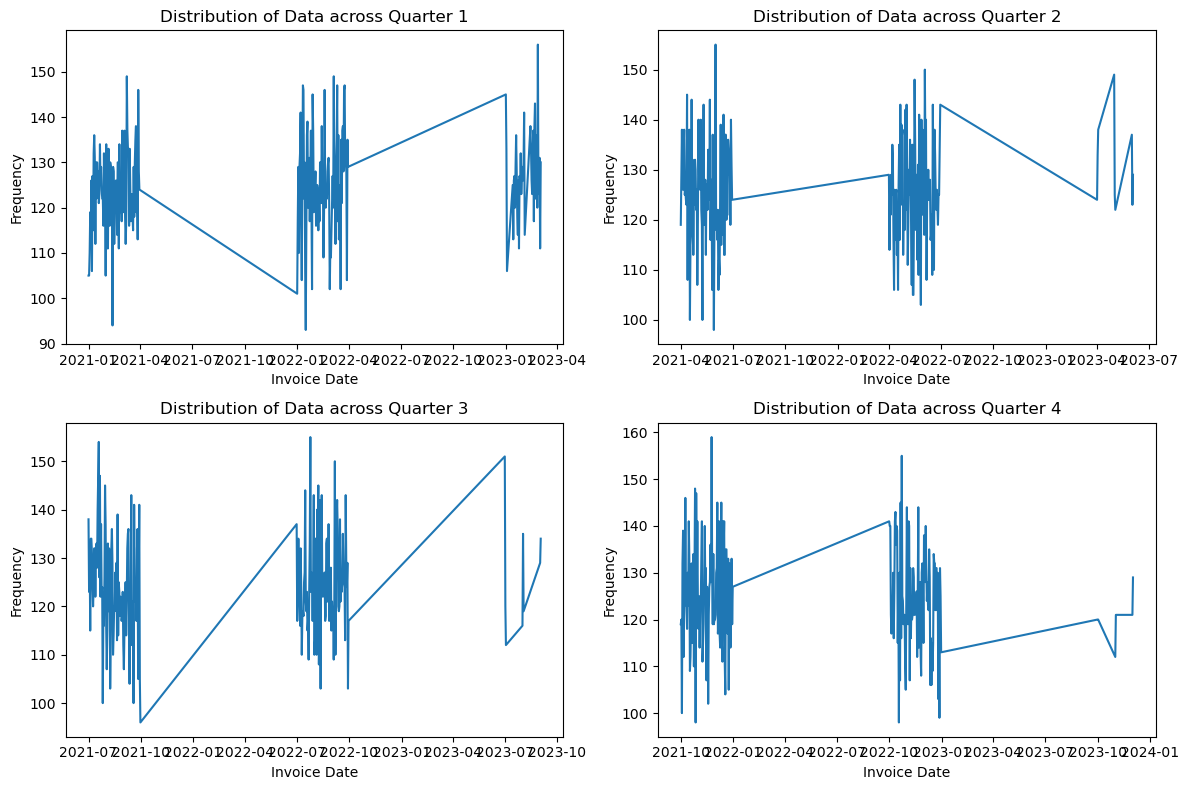

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('fct_invoice.csv')

df['invoice_date'] = pd.to_datetime(df['invoice_date'])

quarterly_counts = df['invoice_date'].dt.quarter.value_counts().sort_index()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    quarter_data = df[df['invoice_date'].dt.quarter == i+1]
    date_counts = quarter_data['invoice_date'].value_counts().sort_index()
    ax.plot(date_counts.index, date_counts.values)
    ax.set_xlabel('Invoice Date')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of Data across Quarter {i+1}')

plt.tight_layout()

plt.show()

#These graphs show the distribution of the frequency of invoice dates per quarter, and show that there is a trend of increased purchases during the start and middle of each of the quarters. However, the frequency of invoice dates decrease towards the end of each quarter, indicating that less sales are being made.





Hard

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: 
category, decade age range (e.g., 10-19, 20-29, and so forth).

In [40]:
merged_1_df=pd.merge(df[['total_sales','category']], newest_df['age'], left_on=df['customer_id'],right_on=newest_df['id'])

table_1=merged_1_df.loc[(merged_1_df['category']=='Shoes') & (merged_1_df['age'] >= 10) & (merged_1_df['age'] <= 19)]
print(table_1)

table_2=merged_1_df.loc[(merged_1_df['category']=='Clothing') & (merged_1_df['age'] >= 10) & (merged_1_df['age'] <= 19)]
print(table_2)

table_3=merged_1_df.loc[(merged_1_df['category']=='Books') & (merged_1_df['age'] >= 10) & (merged_1_df['age'] <= 19)]
print(table_3)

table_4=merged_1_df.loc[(merged_1_df['category']=='Cosmetics') & (merged_1_df['age'] >= 10) & (merged_1_df['age'] <= 19)]
print(table_4)

table_5=merged_1_df.loc[(merged_1_df['category']=='Food & Beverage') & (merged_1_df['age'] >= 10) & (merged_1_df['age'] <= 19)]
print(table_5)

table_6=merged_1_df.loc[(merged_1_df['category']=='Toys') & (merged_1_df['age'] >= 10) & (merged_1_df['age'] <= 19)]
print(table_6)

table_7=merged_1_df.loc[(merged_1_df['category']=='Technology') & (merged_1_df['age'] >= 10) & (merged_1_df['age'] <= 19)]
print(table_7)

table_8=merged_1_df.loc[(merged_1_df['category']=='Souvenir') & (merged_1_df['age'] >= 10) & (merged_1_df['age'] <= 19)]
print(table_8)

       key_0  total_sales category   age
8890     611      2400.68    Shoes  19.0
8903     611      2400.68    Shoes  19.0
8937     611      5401.53    Shoes  19.0
10239    727      5401.53    Shoes  19.0
10242    727     15004.25    Shoes  19.0
...      ...          ...      ...   ...
96704   2449     15004.25    Shoes  19.0
98663   3998       600.17    Shoes  18.0
98780   4326      2400.68    Shoes  19.0
98808   4352      5401.53    Shoes  18.0
98912   5659     15004.25    Shoes  18.0

[153 rows x 4 columns]
       key_0  total_sales  category   age
6109    4116       300.08  Clothing  18.0
8881     611      4801.28  Clothing  19.0
8891     611      1200.32  Clothing  19.0
8892     611      2700.72  Clothing  19.0
8898     611      2700.72  Clothing  19.0
...      ...          ...       ...   ...
98957   4102      4801.28  Clothing  19.0
99150   4263      2700.72  Clothing  18.0
99151   4263      2700.72  Clothing  18.0
99152   4263      1200.32  Clothing  18.0
99165   3945      2700